In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [2]:
#sredjujem dataset isto kao i za kmeans bez atributa Region
data=pd.read_csv("C:/Users/Administrator/2023_Data_Mining_Coffee_Quality_Dataset/cleaned_data.csv")
data.drop("Unnamed: 0",axis=1,inplace=True)
X=data.drop(["Total.Cup.Points"],axis=1)
feature_names=X.columns

In [3]:
hotencoder=OneHotEncoder(feature_name_combiner="concat")
encoder_df=pd.DataFrame(hotencoder.fit_transform(X[["Country.of.Origin","Variety","Processing.Method","Color"]]).toarray(),columns=hotencoder.get_feature_names_out())


In [4]:
X=X.join(encoder_df)
X.drop(labels=["Country.of.Origin","Variety","Processing.Method","Color"],axis=1,inplace=True)
feature_names=X.columns

In [5]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=feature_names)

In [6]:
pca=PCA()
X=pd.DataFrame(pca.fit_transform(X))

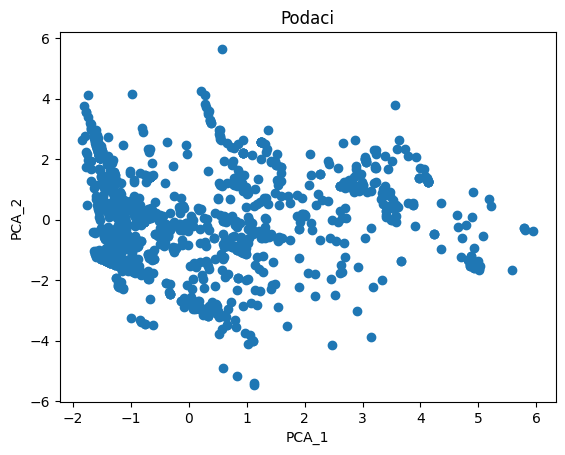

In [7]:
plt.figure()
plt.scatter(X[0],X[1])
plt.title("Podaci")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.show()

In [8]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.1,min_samples=3)
dbscan.fit(X[[0,1]])

DBSCAN(eps=0.1, min_samples=3)

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

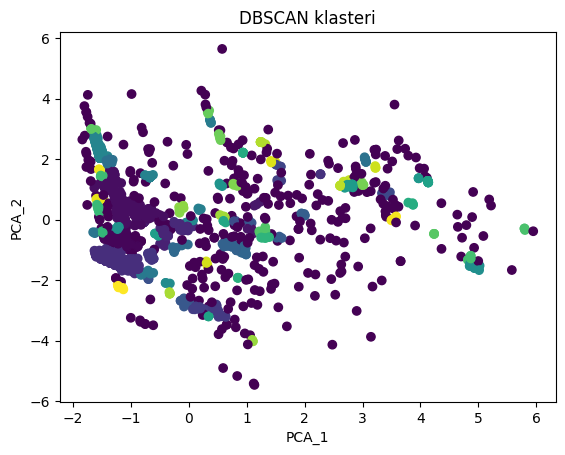

In [10]:
#vizuelizacija
X['DBSCAN_labels']=dbscan.labels_ 
plt.figure()
plt.scatter(X[0],X[1],c=X['DBSCAN_labels'])
plt.title('DBSCAN klasteri')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()


In [11]:
#optimalna vrednost za epsilon 
#kalkulisemo prosecnu vrednost najblizih k suseda svake tacke
#broj suseda stavljamo na minPts
from sklearn.neighbors import NearestNeighbors
nn= NearestNeighbors(n_neighbors=3)
nbrs = nn.fit(X[[0,1]])
distances, indices = nbrs.kneighbors(X[[0,1]])

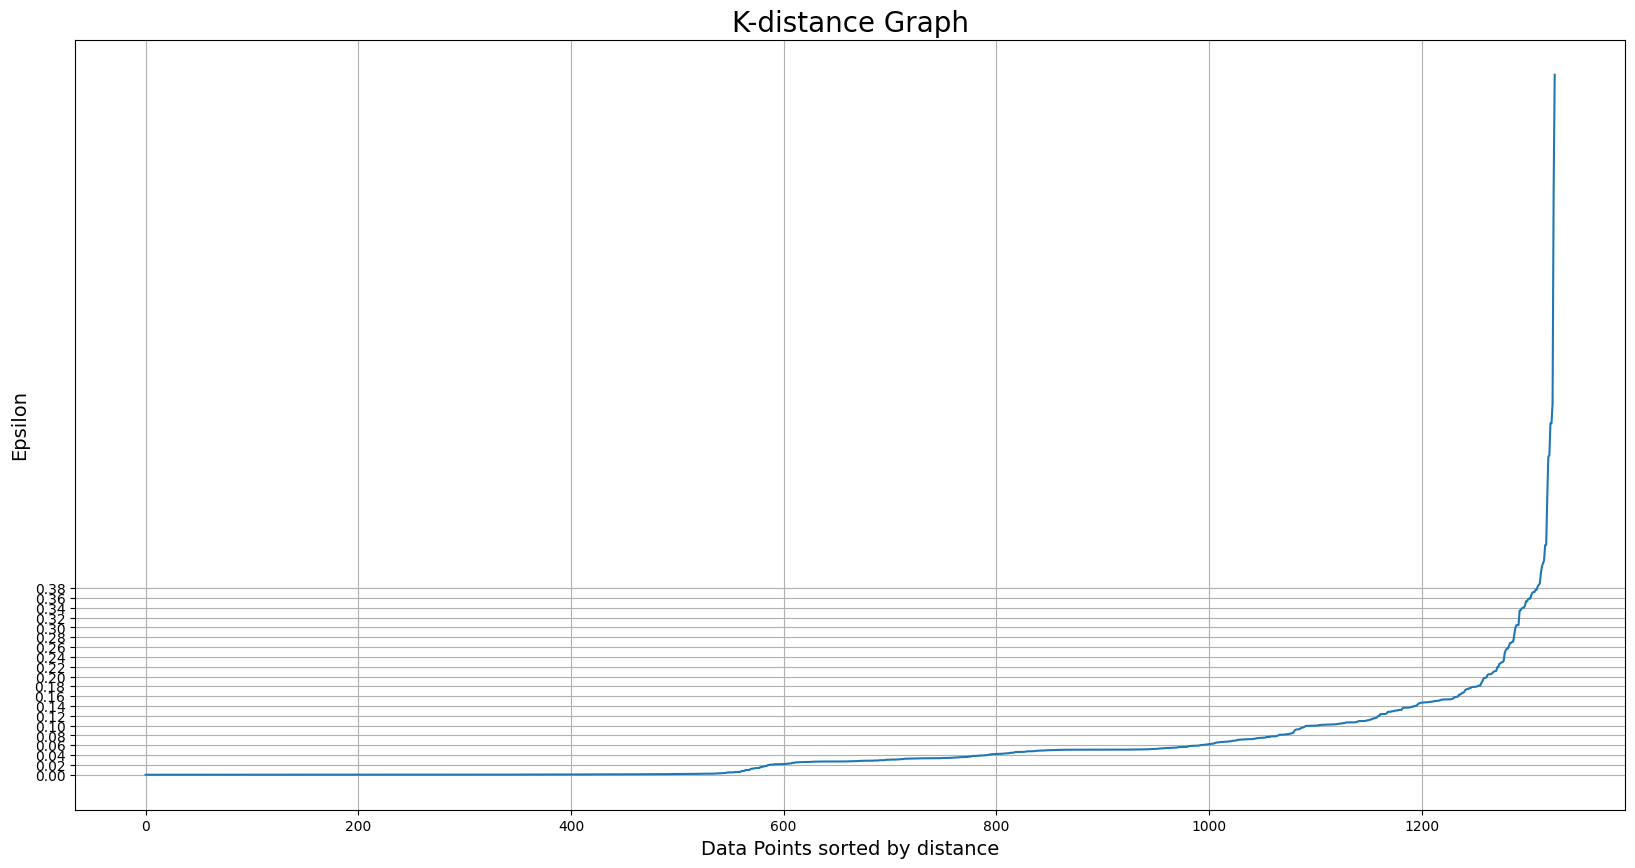

In [12]:
#Abhishek Sharma - Analytics Vidhya
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.yticks(np.arange(0.0,0.4,0.02))
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.grid()
plt.show()

In [13]:
#Optimalno oko 0.2

In [20]:
dbscan=DBSCAN(eps=0.2,min_samples=4)
dbscan.fit(X[[0,1]])


DBSCAN(eps=0.2, min_samples=4)

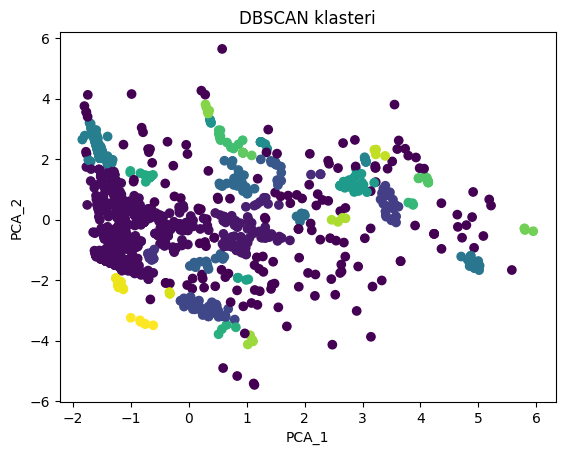

In [21]:
#vizuelizacija
X['DBSCAN_labels']=dbscan.labels_ 
plt.figure()
plt.scatter(X[0],X[1],c=X['DBSCAN_labels'])
plt.title('DBSCAN klasteri')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

In [22]:
from sklearn import metrics
metrics.silhouette_score(X, X['DBSCAN_labels'])

0.162790475583066

In [23]:
#koeficijent senki je jako mali, imamo dosta preklapajucih klastera

In [28]:
X['DBSCAN_labels'].unique()

array([ 0,  1, -1,  2,  3,  4,  5,  6,  7,  8,  9, 20, 10, 11, 12, 13, 14,
       15, 16, 17, 29, 18, 19, 21, 22, 23, 27, 24, 26, 28, 25, 30, 31, 32],
      dtype=int64)